### Importing all needed libraries for analysis

In [2]:
#import as libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

from wordcloud import WordCloud
from wordcloud import STOPWORDS



import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [3]:
review_df= pd.read_csv(r"C:\Users\SISAKU\Downloads\archive (69)\Womens Clothing E-Commerce Reviews.csv")

review_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Checking dataset information

In [4]:
print('the dataset information' + str(review_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
the dataset informationNone


In [5]:
review_df['Rating']

0        4
1        5
2        3
3        5
4        5
        ..
23481    5
23482    3
23483    3
23484    3
23485    5
Name: Rating, Length: 23486, dtype: int64

### Checking for null values

In [6]:
review_df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Replacing null values

In [7]:
review_df['Title'] = review_df['Title'].fillna('missing')

In [8]:
review_df.isnull().sum()

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Title                        0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [9]:
review_df['Review Text'] = review_df['Review Text'].fillna('missing')

In [10]:
review_df.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

### Counting overall rating distribution

In [11]:
review_df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [12]:
review_df['review'] = review_df['Review Text'] + review_df['Title']

review_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review
0,0,767,33,missing,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1,1080,34,missing,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...


### Dropping the 'Review text' and 'Title' column after concatenating them to 'Review' column

In [13]:
review_df = review_df.drop(['Review Text','Title'], axis=1)

In [14]:
review_df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,2,1077,60,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...


### Writing a function using 'Rating' 

In [15]:
def sent(ratings):
    if ratings['Rating'] == 3:
        value = 'Neutral'
    elif ratings['Rating'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

### Applying the function on 'Sentiment' column

In [16]:
review_df['Sentiment'] = review_df.apply(sent, axis=1)

review_df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review,Sentiment
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,Positive
1,1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,Positive
2,2,1077,60,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,Neutral
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,4,847,47,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,Positive


### Counting sentiments

In [17]:
review_df['Sentiment'].value_counts()

Positive    18208
Neutral      2871
Negative     2407
Name: Sentiment, dtype: int64

### Count of customer by Sentiment

In [18]:
fig = px.histogram(review_df, x="Sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Customer Sentiment')
fig.show()

### Count of customer by Rating

In [19]:
fig = px.histogram(review_df, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Customer Rating')
fig.show()

### Popular words in 'Review' where 'sentiment' is Positive

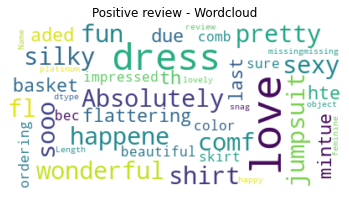

In [20]:
positive_review = review_df['review'][review_df["Sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_review))
plt.figure()
plt.title("Positive review - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###  Popular words in 'Review' where 'sentiment' is Neutral

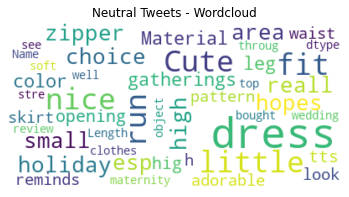

In [21]:
neutral_review = review_df['review'][review_df["Sentiment"] == 'Neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_review))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 ### Popular words in 'Review' where  'sentiment' is Negative

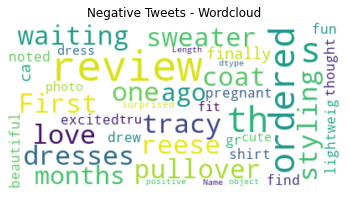

In [22]:
negative_review = review_df['review'][review_df["Sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_review))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()